In [1]:
import numpy as np; np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
from pandas import DataFrame
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go
from itertools import product

In [2]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestradoNOTA',
        user = "root",
        passwd = "admin123"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)
    

,A,B,C,D
aaa,1.764052,0.400157,0.978738,2.240893
bbb,1.867558,0.977278,0.950088,0.151357
ccc,0.103219,0.410599,0.144044,1.454274
ddd,0.761038,0.121675,0.443863,0.333674
eee,1.494079,0.205158,0.313068,0.854096


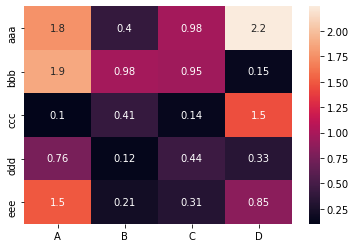

In [4]:
Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)
df

In [15]:
# média das notas do aluno por semestre
select_query = "select course, count(*) as count, leaving_form from student_courses group by course, leaving_form;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

columns = records['leaving_form'].unique().tolist()
index = records['course'].unique().tolist()

df = pd.DataFrame ({}, columns, index)

for col in columns:
    for ind in index:
        val = records.loc[(records['course'] == ind) & (records['leaving_form'] == col)]
        if len(val['count'].values) > 0:
            df.loc[[col],[ind]] = val['count'].values[0]
        else:
            df.loc[[col],[ind]] = 1

# ax = sns.heatmap(df)
sns.heatmap(df.corr())
# plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
select_query = "select course, count(*) as count, leaving_form from student_courses group by course, leaving_form;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

In [7]:
df

,Ciencia da Computacao,Computacao,Engenharia Civil,Engenharia de Computacao,Engenharia Eletrica,Engenharia Florestal,Engenharia Mecanica,Engenharia Mecatronica,Estatistica,Matematica
Formatura,194,127,467,181,349,267,350,250,196,193
Saiu,351,418,59,268,156,78,164,213,230,587
Falecimento,2,1,1,2,1,1,1,1,1,1
Ativo,378,316,259,353,278,163,299,386,277,385
Mudança de curriculo,1,1,1,1,1,1,1,1,1,47


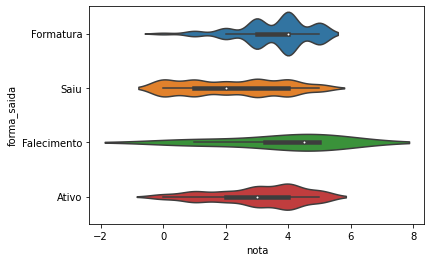

In [8]:
select_query = "select CASE            WHEN score = 'SS' THEN 5           WHEN score = 'MS' THEN 4           WHEN score = 'MM' THEN 3           WHEN score = 'MI' THEN 2            WHEN score = 'II' THEN 1           ELSE 0            END AS nota, leaving_form as forma_saida from student_courses as SC INNER JOIN student_course_subject as SCS on SC.id = SCS.id_student_course INNER JOIN subjects as S on SCS.id_subject = S.id where S.name = 'COMPUTACAO BASICA';"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

# tips = sns.load_dataset("tips")
# tips
ax = sns.violinplot(x="nota", y="forma_saida", data=records)
plt.show()

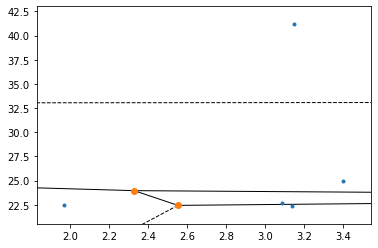

In [9]:
select_query = "select AVG(average_in_semester) as AVG, AVG(total_credits_semester) as total_credits from student_courses as SC INNER JOIN student_course_subject as SCS on SC.id = SCS.id_student_course group by leaving_form ;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

points = records.to_numpy()
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [14]:
select_query="select CASE            WHEN score = 'SS' THEN 5           WHEN score = 'MS' THEN 4           WHEN score = 'MM' THEN 3           WHEN score = 'MI' THEN 2            WHEN score = 'II' THEN 1           ELSE 0            END AS newScore, average_in_semester as média, total_credits_semester as total_creditos, leaving_form as forma_saida from student_course_subject as SCS Inner join subjects as S on S.id = SCS.id_subject INNER JOIN student_courses as SC ON SC.id = SCS.id_student_course where name = 'Computação Básica' and leaving_form <> 'Mudança de curriculo' and leaving_form <> 'Ativo';"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

records['newScore'] = pd.to_numeric(records['newScore'])
records['total_creditos'] = pd.to_numeric(records['total_creditos'])
records['média'] = pd.to_numeric(records['média'])

fig = px.scatter(records, x="média", y="total_creditos",
	         size="newScore", color="forma_saida",
                 log_x=True, size_max=60)
fig.show()

In [15]:
def graph(df):
    newData = []
    uniqueValues = (df['id_student']).unique()
#     print(uniqueValues, len(uniqueValues))
    for student in uniqueValues:
        student_classes = df[df['id_student'] == student]
        student_classes = student_classes.sort_values(by=['semester_year'])
        
        uniqueYears = (df['semester_year']).unique()
        for i in range(len(uniqueYears) - 1):
            year = uniqueYears[i]
            nextYear = uniqueYears[i+1]
            
            classYear = df[df['semester_year'] == year]
            classYear = classYear['name'].values.tolist()
            
            
            classNextYear = df[df['semester_year'] == nextYear]
            classNextYear = classNextYear['name'].values.tolist()
            senhas = [ [s] + [num] for s, num in product(classYear, classNextYear) ]
#             print(senhas)
            newData = newData + senhas
    print(newData)

In [17]:
select_query = "select id_student, name, semester_year from student_course_subject as SCS LEFT JOIN subjects as S ON SCS.id_subject = S.id;"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

# graph(records)

In [ ]:
records['name'].values.tolist()

In [ ]:

G = nx.random_geometric_graph(200, 0.125)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


In [38]:
import plotly.express as px
import pandas as pd

select_query = "select id_student, course, university_entrance_period, leaving_period from student_courses as SC inner join students as S on SC.id_student = S.id limit 10"
cursor.execute(select_query)
records = DataFrame(cursor.fetchall())
records.columns = cursor.column_names

# graph(records)

df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')
])

semester_year = records['university_entrance_period'].tolist()
records['university_entrance_period'] = ["{}-{}".format(x[0:-1],x[-1]) for x in semester_year]

semester_year = records['leaving_period'].tolist()
records['leaving_period'] = ["{}-{}".format(int(x[0:-1])+4,x[-1]) for x in semester_year]

# fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
# fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
# fig.show()

In [39]:
records

,id_student,course,university_entrance_period,leaving_period
0,1,Ciencia da Computacao,2006-2,2010-2
1,10,Ciencia da Computacao,2008-1,2012-1
2,100,Ciencia da Computacao,2010-2,2014-2
3,1000,Computacao,2011-1,2015-1
4,1001,Computacao,2011-1,2015-1
5,1002,Computacao,2011-1,2015-1
6,1003,Computacao,2011-1,2015-1
7,1004,Computacao,2011-1,2015-1
8,1005,Computacao,2011-1,2015-1
9,1006,Computacao,2011-1,2015-1


In [40]:
fig = px.timeline(records, x_start="university_entrance_period", x_end="leaving_period", y="id_student")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()